In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

fashion_mnist = tf.keras.datasets.fashion_mnist

# LOAD DATASET

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# PRINT OUT THE SHAPES OF THE IMAGES/LABELS

print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


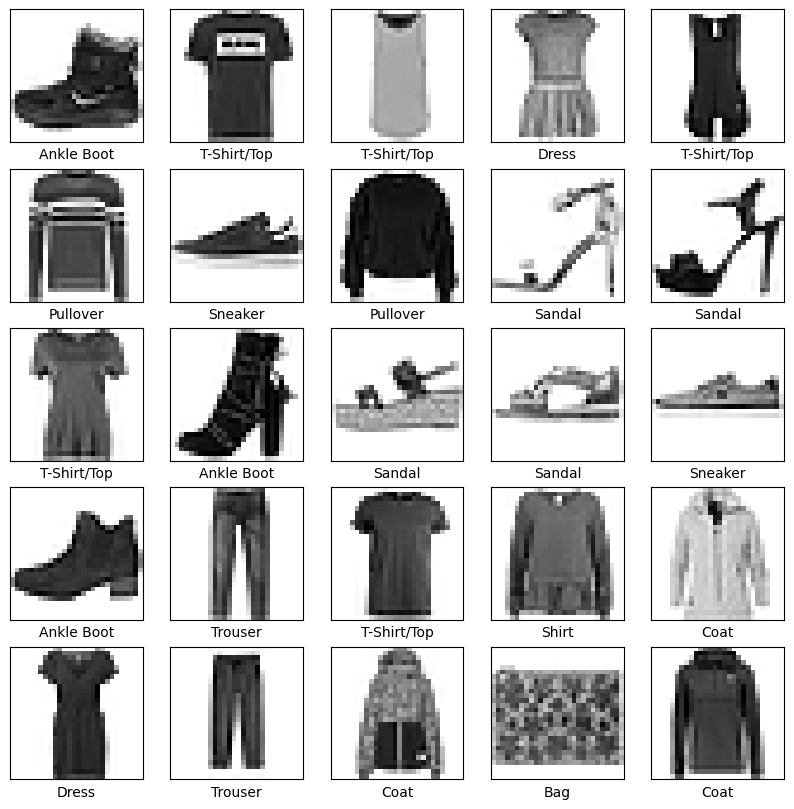

In [48]:
# IMAGE PLOTTING

class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  
    plt.imshow(train_images[i], cmap=plt.cm.binary)  
    plt.xlabel(class_names[train_labels[i]])  

plt.show()

In [49]:
# ONE-HOT ENCODINGS

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
# MAKE SEQUENTIAL MODEL

model = tf.keras.Sequential([
    # Flatten layer (Images are 28 x 28)
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Lambda layer that normalizes values of x
    tf.keras.layers.Lambda(lambda x: x / 255.0),

    # Three Dense Layers Between 64-256 output units and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),

    # Dense Layer with 10 output units and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# COMPILE MODEL AND PRINT SUMMARY

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Tage\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# TRAIN MODEL

history = model.fit(train_images, one_hot_train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.7532 - loss: 0.6914 - val_accuracy: 0.8500 - val_loss: 0.4148
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.8575 - loss: 0.3842 - val_accuracy: 0.8696 - val_loss: 0.3632
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8706 - loss: 0.3494 - val_accuracy: 0.8708 - val_loss: 0.3596
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.8814 - loss: 0.3210 - val_accuracy: 0.8813 - val_loss: 0.3348
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8843 - loss: 0.3069 - val_accuracy: 0.8705 - val_loss: 0.3491
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8910 - loss: 0.2874 - val_accuracy: 0.8767 - val_loss: 0.3430
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.8989 - loss: 0.2699 - val_accuracy: 0.8768 - val_loss: 0.3415
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.9017 -

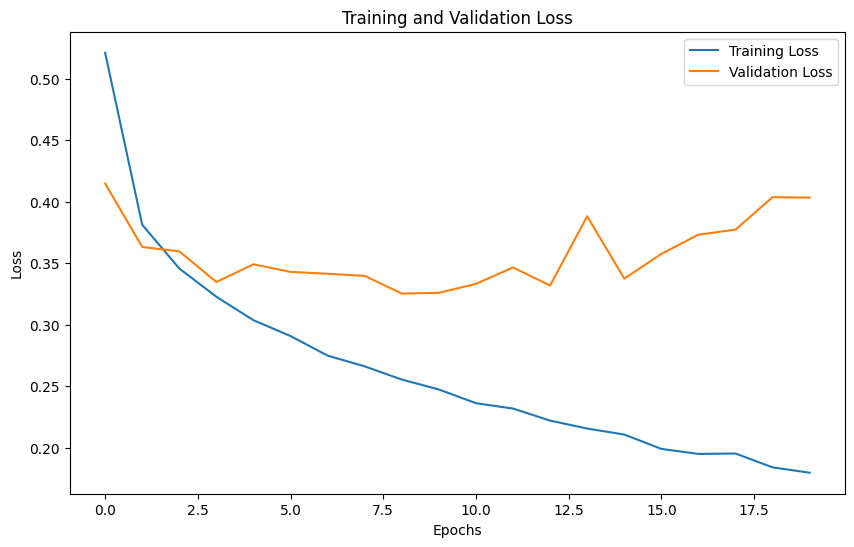

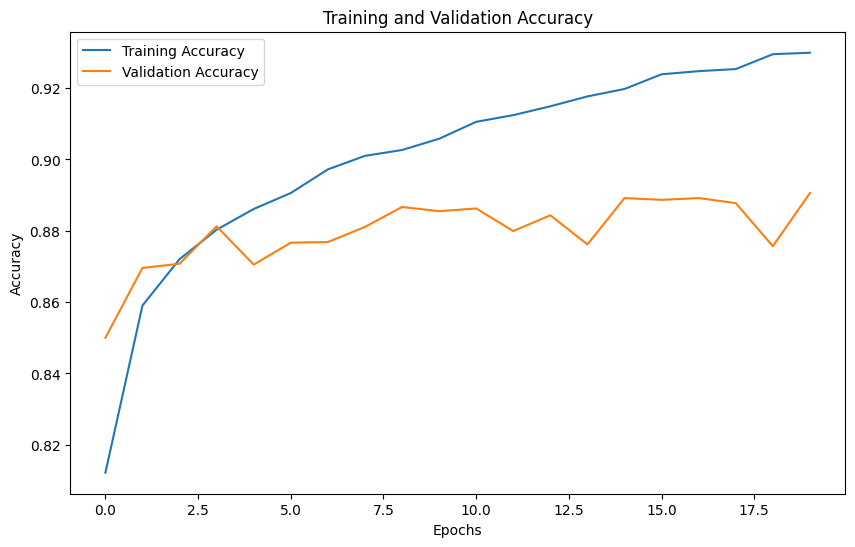

In [52]:
# Plot for Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot for Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
# Generate the Model's Predictions

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Report on Accuracy of Test Predictions

accuracy = np.mean(predicted_labels == test_labels)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step
Test Accuracy: 0.885


In [54]:
# Generate classification report

print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-Shirt/Top       0.83      0.85      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.77      0.83      0.80      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.84      0.76      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.69      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle Boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



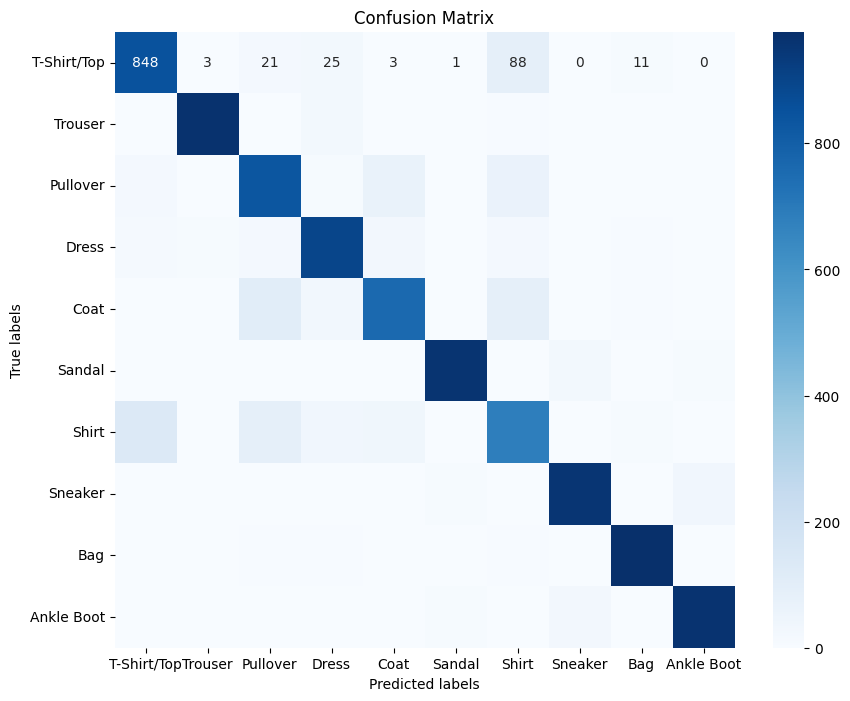

In [55]:
# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()